In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
col_names=["patient_age", "year_of_operation", "positive_axillary_nodes", "survival_status"];
df=pd.read_csv('haberman kaggle.csv',names=col_names)
df.head()

,patient_age,year_of_operation,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
df.columns

Index(['patient_age', 'year_of_operation', 'positive_axillary_nodes',
       'survival_status'],
      dtype='object')

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
patient_age,306.0,52.457516,10.803452,30.0,44.0,52.0,60.75,83.0
year_of_operation,306.0,62.852941,3.249405,58.0,60.0,63.0,65.75,69.0
positive_axillary_nodes,306.0,4.026144,7.189654,0.0,0.0,1.0,4.00,52.0
survival_status,306.0,1.264706,0.441899,1.0,1.0,1.0,2.00,2.0


In [5]:
x=df[['patient_age', 'year_of_operation', 'positive_axillary_nodes']]
y=df['survival_status']


In [6]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

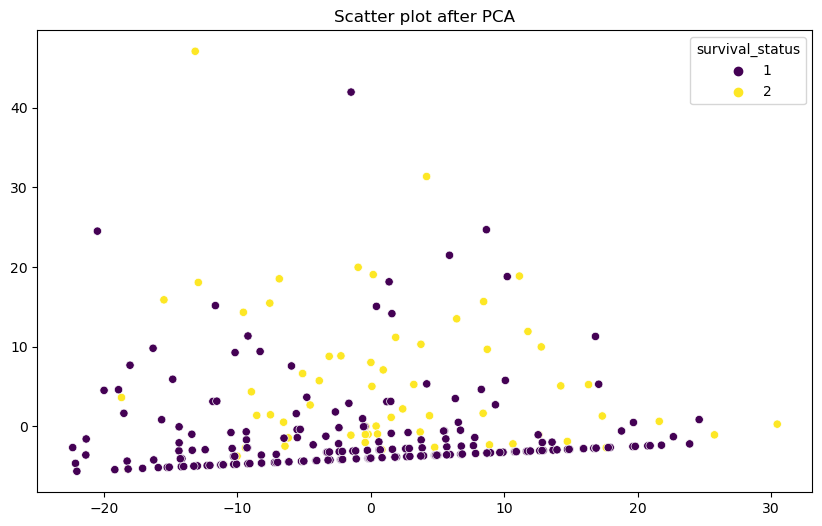

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y, palette='viridis')
plt.title('Scatter plot after PCA')
plt.show()

<Axes: xlabel='survival_status'>

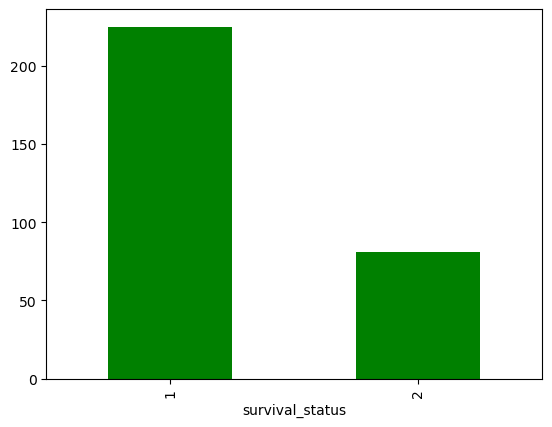

In [33]:
df['survival_status'].value_counts().plot(kind='bar', color='green')

<function matplotlib.pyplot.show(close=None, block=None)>

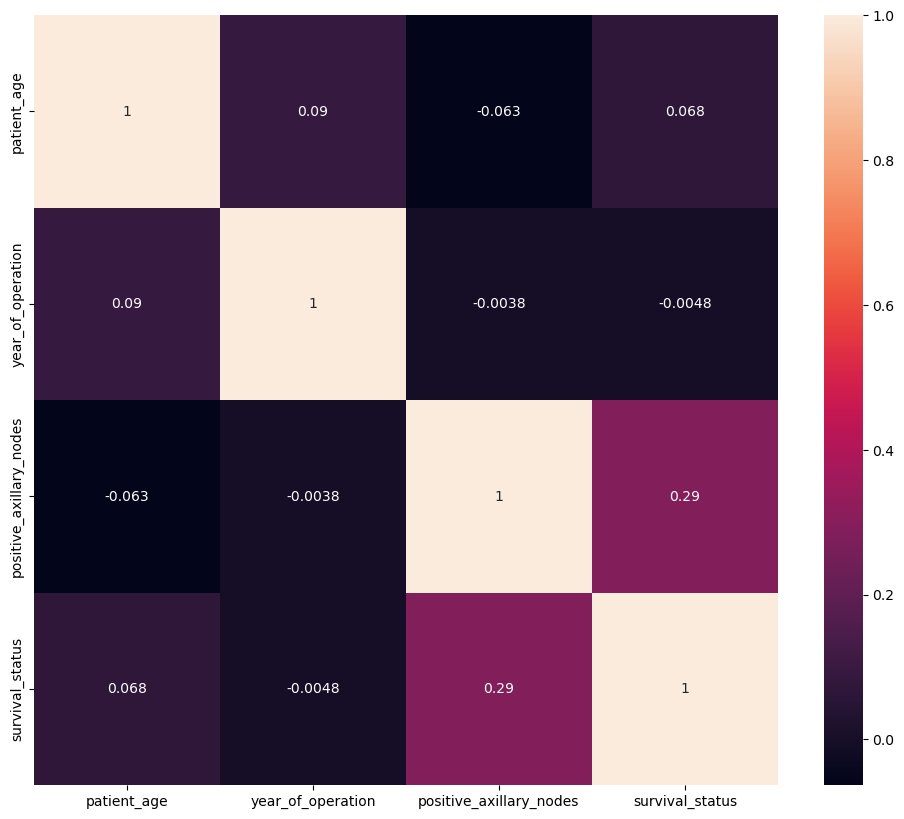

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),annot=True)
plt.show

In [10]:
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.20,random_state=42)

In [11]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

### KNN

In [12]:
# Hyperparameter tuning
best_accuracy = 0
best_k = 1
for k in range(1, 26):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train, y_train)
    y_pred = neigh.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
best_k

4

In [13]:
neigh=KNeighborsClassifier(n_neighbors=2, p= 3, weights='uniform')
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2, p=3)

In [14]:
y_pred=neigh.predict(x_test)
y_pred=list(y_pred)
y_test=list(y_test)

In [15]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[39,  5],
       [14,  4]], dtype=int64)

In [16]:
score=accuracy_score(y_test,y_pred)
score

0.6935483870967742

In [17]:
neigh=KNeighborsClassifier(n_neighbors=4,weights='uniform')
neigh.fit(x_train,y_train)
y_pred_train=neigh.predict(x_train)
y_pred_test=neigh.predict(x_test)
from sklearn.metrics import accuracy_score
score_test=accuracy_score(y_pred_test,y_test)
print('test accuracy is ',score_test)
score_train=accuracy_score(y_pred_train,y_train)
print('train accuracy is ',score_train)

test accuracy is  0.7258064516129032
train accuracy is  0.7950819672131147


In [18]:
for i in range(1,26):
    neigh=KNeighborsClassifier(n_neighbors=i,weights='uniform')
    neigh.fit(x_train,y_train)
    y_pred_train=neigh.predict(x_train)
    y_pred_test=neigh.predict(x_test)
    from sklearn.metrics import accuracy_score
    score_test=accuracy_score(y_pred_test,y_test)
    print('for',i,'test accuracy is ',score_test)
    score_train=accuracy_score(y_pred_train,y_train)
    print('for',i,' train accuracy is ',score_train)

for 1 test accuracy is  0.6451612903225806
for 1  train accuracy is  0.9836065573770492
for 2 test accuracy is  0.6935483870967742
for 2  train accuracy is  0.8237704918032787
for 3 test accuracy is  0.6451612903225806
for 3  train accuracy is  0.819672131147541
for 4 test accuracy is  0.7258064516129032
for 4  train accuracy is  0.7950819672131147
for 5 test accuracy is  0.7096774193548387
for 5  train accuracy is  0.8032786885245902
for 6 test accuracy is  0.6935483870967742
for 6  train accuracy is  0.7786885245901639
for 7 test accuracy is  0.6935483870967742
for 7  train accuracy is  0.7745901639344263
for 8 test accuracy is  0.6774193548387096
for 8  train accuracy is  0.7827868852459017
for 9 test accuracy is  0.6612903225806451
for 9  train accuracy is  0.7663934426229508
for 10 test accuracy is  0.6774193548387096
for 10  train accuracy is  0.7868852459016393
for 11 test accuracy is  0.6935483870967742
for 11  train accuracy is  0.7827868852459017
for 12 test accuracy is  0.70

In [19]:
from sklearn.model_selection import GridSearchCV 
parameters = {'n_neighbors': [1,2,3,4], 'weights': ['uniform', 'distance'], 'p': [3, 4, 5]}

classifier = KNeighborsClassifier()
clf = GridSearchCV(classifier, parameters,cv=8)

clf.fit(x_train, y_train)
clf.best_params_

{'n_neighbors': 2, 'p': 4, 'weights': 'uniform'}

In [20]:
best_params = clf.best_params_
classifier_best = KNeighborsClassifier(**best_params)

# Fit the classifier with the best parameters on the training data
classifier_best.fit(x_train, y_train)

# Predictions on test and training sets
y_test_pred = classifier_best.predict(x_test)
y_train_pred = classifier_best.predict(x_train)

# Calculate accuracies
acc_test = accuracy_score(y_test_pred, y_test)
print('Test accuracy is ', acc_test)

acc_train = accuracy_score(y_train_pred, y_train)
print('Train accuracy is ', acc_train)

Test accuracy is  0.6774193548387096
Train accuracy is  0.8155737704918032


### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [23]:
dt_pred = dt_classifier.predict(x_test)

In [24]:
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_accuracy

0.6612903225806451

In [25]:
dt_param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 5, 10, 15]}
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=5)
dt_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 15]})

In [26]:
best_params = dt_grid_search.best_estimator_
best_params

DecisionTreeClassifier(max_depth=2)

In [27]:
dt_pred_tuned = best_params.predict(x_test)
dt_accuracy_tuned = accuracy_score(y_test, dt_pred_tuned)
dt_accuracy_tuned

0.7258064516129032

In [28]:
for i in range(1, 26):
    dt_classifier = DecisionTreeClassifier(max_depth=i, random_state=42)
    dt_classifier.fit(x_train, y_train)
    
    y_pred_train = dt_classifier.predict(x_train)
    score_train = accuracy_score(y_pred_train, y_train)
    print('For max_depth =', i, 'train accuracy is', score_train)

    y_pred_test = dt_classifier.predict(x_test)
    score_test = accuracy_score(y_pred_test, y_test)
    print('For max_depth =', i, 'test accuracy is', score_test)

For max_depth = 1 train accuracy is 0.7540983606557377
For max_depth = 1 test accuracy is 0.6935483870967742
For max_depth = 2 train accuracy is 0.7909836065573771
For max_depth = 2 test accuracy is 0.7258064516129032
For max_depth = 3 train accuracy is 0.8032786885245902
For max_depth = 3 test accuracy is 0.7258064516129032
For max_depth = 4 train accuracy is 0.8073770491803278
For max_depth = 4 test accuracy is 0.6935483870967742
For max_depth = 5 train accuracy is 0.8401639344262295
For max_depth = 5 test accuracy is 0.6774193548387096
For max_depth = 6 train accuracy is 0.8565573770491803
For max_depth = 6 test accuracy is 0.6612903225806451
For max_depth = 7 train accuracy is 0.8770491803278688
For max_depth = 7 test accuracy is 0.6774193548387096
For max_depth = 8 train accuracy is 0.9057377049180327
For max_depth = 8 test accuracy is 0.6774193548387096
For max_depth = 9 train accuracy is 0.9221311475409836
For max_depth = 9 test accuracy is 0.6774193548387096
For max_depth = 10 

In [29]:
dt_classifier = DecisionTreeClassifier(max_depth=2)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [30]:
dt_pred = dt_classifier.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_accuracy

0.7258064516129032

In [51]:
class_rep = classification_report(y_test, y_pred)
class_rep

'              precision    recall  f1-score   support\n\n           1       0.74      0.91      0.82        44\n           2       0.50      0.22      0.31        18\n\n    accuracy                           0.71        62\n   macro avg       0.62      0.57      0.56        62\nweighted avg       0.67      0.71      0.67        62\n'

### Random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf_classifier= RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
y_pred = rf_classifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1], dtype=int64)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
accuracy 

0.7096774193548387

In [50]:
class_rep = classification_report(y_test, y_pred)
class_rep

'              precision    recall  f1-score   support\n\n           1       0.74      0.91      0.82        44\n           2       0.50      0.22      0.31        18\n\n    accuracy                           0.71        62\n   macro avg       0.62      0.57      0.56        62\nweighted avg       0.67      0.71      0.67        62\n'

### Logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [54]:
y_pred = logistic_model.predict(x_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7096774193548387

### Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [57]:
x, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [58]:
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [60]:
y_pred = naive_bayes_classifier.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
accuracy
cm = confusion_matrix(y_test, y_pred)
cm


'              precision    recall  f1-score   support\n\n           0       0.72      0.90      0.80        93\n           1       0.89      0.70      0.79       107\n\n    accuracy                           0.80       200\n   macro avg       0.81      0.80      0.79       200\nweighted avg       0.81      0.80      0.79       200\n'

In [62]:
class_rep = classification_report(y_test, y_pred)
class_rep

'              precision    recall  f1-score   support\n\n           0       0.72      0.90      0.80        93\n           1       0.89      0.70      0.79       107\n\n    accuracy                           0.80       200\n   macro avg       0.81      0.80      0.79       200\nweighted avg       0.81      0.80      0.79       200\n'